<a href="https://colab.research.google.com/github/khoaleeeeee/Fake-News-Classification/blob/main/true_fake_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np 
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, LSTM, GlobalMaxPool1D, Embedding
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [6]:
true_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

In [7]:
true_data = true_data.drop(columns=['title', 'subject', 'date'])
fake_data = fake_data.drop(columns=['title', 'subject', 'date'])

In [8]:
true_data = true_data.to_numpy()
fake_data = fake_data.to_numpy()

In [9]:
N_true = len(true_data)
N_fake = len(fake_data)

true_data = true_data.reshape(N_true,)
fake_data = fake_data.reshape(N_fake,)

true_label = np.array([1]*N_true)
fake_label = np.array([0]*N_fake)

preprocessed_true_data = []

for texts in true_data:
  i = 0
  if '-' in texts:
    while texts[i] != '-':
      i += 1
    texts = texts[i + 2:]
  preprocessed_true_data.append(texts)

true_data = preprocessed_true_data

In [10]:
true_data = np.array(true_data)

In [11]:
X = np.concatenate((true_data, fake_data), axis=0)

In [12]:
Y = np.concatenate((true_label, fake_label), axis=0)

In [13]:
X, Y = shuffle(X, Y)

In [14]:
Xtrain = X[:-10000]
Ytrain = Y[:-10000]

Xtest = X[-10000:]
Ytest = Y[-10000:]

In [15]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(Xtrain)
sequences_train = tokenizer.texts_to_sequences(Xtrain)
sequences_test = tokenizer.texts_to_sequences(Xtest)

In [16]:
word2idx = tokenizer.word_index
V = len(word2idx)
print("Number of unique tokens:", V)

Number of unique tokens: 123871


In [17]:
data_train = pad_sequences(sequences_train)

In [18]:
T = data_train.shape[1]

In [19]:
data_test = pad_sequences(sequences_test, maxlen=T)

In [20]:
# buil the model
# embedding dimensionality
D = 20
# hidden layer dimensionality
M = 15

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
r = model.fit(data_train, Ytrain, validation_data=(data_test, Ytest), epochs=10, batch_size=1000)

Epoch 1/10
35/35 [==============================] - 813s 23s/step - loss: 0.6791 - accuracy: 0.5489 - val_loss: 0.6384 - val_accuracy: 0.6552
Epoch 2/10
35/35 [==============================] - 820s 23s/step - loss: 0.5507 - accuracy: 0.8131 - val_loss: 0.4478 - val_accuracy: 0.9410
Epoch 3/10
35/35 [==============================] - 838s 24s/step - loss: 0.3847 - accuracy: 0.9534 - val_loss: 0.2773 - val_accuracy: 0.9679
Epoch 4/10
35/35 [==============================] - 841s 24s/step - loss: 0.2418 - accuracy: 0.9654 - val_loss: 0.2316 - val_accuracy: 0.9585
Epoch 5/10
35/35 [==============================] - 833s 24s/step - loss: 0.1931 - accuracy: 0.9698 - val_loss: 0.1590 - val_accuracy: 0.9702
Epoch 6/10
35/35 [==============================] - 828s 24s/step - loss: 0.1300 - accuracy: 0.9829 - val_loss: 0.1239 - val_accuracy: 0.9892
Epoch 7/10
35/35 [==============================] - 830s 24s/step - loss: 0.1024 - accuracy: 0.9946 - val_loss: 0.1089 - val_accuracy: 0.9878
Epoch 

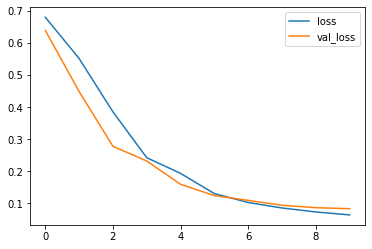

In [23]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()